Number of TTI to resend: 10
Alpha for Proportional Fair: 0.8

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

   MCS/RB   1    2    3    4    5    6    7    8    9  ...    91    92    93  \
0       0  32   64   96  128  168  208  240  272  304  ...  3104  3104  3240   
1       1  40   88  128  176  224  272  304  352  408  ...  3976  4040  4104   
2       2  48  104  160  224  272  320  384  432  504  ...  4872  5000  5000   
3       3  64  136  208  288  352  432  504  576  640  ...  6408  6536  6536   
4       4  80  168  256  352  432  528  608  704  808  ...  7808  7936  8064   

     94    95    96    97    98    99   100  
0  3240  3240  3240  3368  3368  3368  3368  
1  4104  4232  4232  4232  4360  4360  4360  
2  5128  5128  5256  5256  5256  5384  5384  
3  6664  6664  6792  6792  6920  6920  7048  
4  8064  8192  8192  8456  8456  8456  8712  

[5 rows x 101 columns]


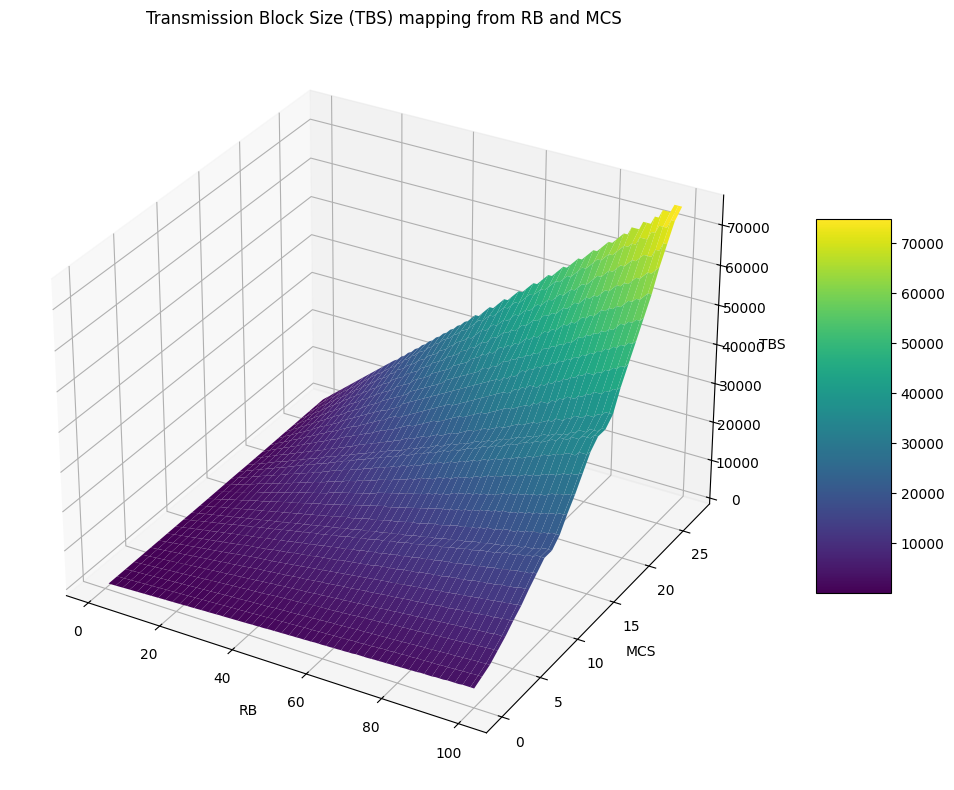

In [2]:
TBS = pd.read_csv('./Simulation/TBSArray.csv')

print(TBS.head(5))

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

X = np.arange(1, 101)  # RB
Y = np.arange(0, 28)   # MCS
X, Y = np.meshgrid(X, Y)
Z = TBS.iloc[:, 1:].astype(float).values

surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis)
ax.set_xlabel('RB')
ax.set_ylabel('MCS')
ax.set_zlabel('TBS')
ax.set_title('Transmission Block Size (TBS) mapping from RB and MCS')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.tight_layout()
plt.show()

In [3]:
# Burst Traffic
RoundRobin_BurstTraffic = pd.read_csv('./Simulation/result/burst_traffic/rr.csv')
MaxCQI_BurstTraffic = pd.read_csv('./Simulation/result/burst_traffic/max_cqi.csv')
PF_BurstTraffic = pd.read_csv('./Simulation/result/burst_traffic/pf.csv')

# High Traffic
RoundRobin_HighTraffic = pd.read_csv('./Simulation/result/high_traffic/rr.csv')
MaxCQI_HighTraffic = pd.read_csv('./Simulation/result/high_traffic/max_cqi.csv')
PF_HighTraffic = pd.read_csv('./Simulation/result/high_traffic/pf.csv')

# Ideal Traffic 100000 bits
RoundRobin_IdealTraffic = pd.read_csv('./Simulation/result/ideal_condition_bsr100000/rr.csv')
MaxCQI_IdealTraffic = pd.read_csv('./Simulation/result/ideal_condition_bsr100000/max_cqi.csv')
PF_IdealTraffic = pd.read_csv('./Simulation/result/ideal_condition_bsr100000/pf.csv')

# Low Traffic
RoundRobin_LowTraffic = pd.read_csv('./Simulation/result/low_traffic/rr.csv')
MaxCQI_LowTraffic = pd.read_csv('./Simulation/result/low_traffic/max_cqi.csv')
PF_LowTraffic = pd.read_csv('./Simulation/result/low_traffic/pf.csv')

# Mobility Pattern
RoundRobin_MobilityPattern = pd.read_csv('./Simulation/result/mobility_pattern/rr.csv')
MaxCQI_MobilityPattern = pd.read_csv('./Simulation/result/mobility_pattern/max_cqi.csv')
PF_MobilityPattern = pd.read_csv('./Simulation/result/mobility_pattern/pf.csv')


# Create DataFrame for each property such as: Scheduler Count, Avg Throughput, Max Delay, Avg Delay having 4 columns is UE, RoundRobin, MaxCQI, PF
ue = [col for col in RoundRobin_BurstTraffic.columns if col.startswith('UE')]
scheduler_count_DF1 = pd.DataFrame(index=ue)
avg_throughput_DF1 = pd.DataFrame(index=ue)
max_delay_DF1 = pd.DataFrame(index=ue)
avg_delay_DF1 = pd.DataFrame(index=ue)

scheduler_count_DF2 = pd.DataFrame(index=ue)
avg_throughput_DF2 = pd.DataFrame(index=ue)
max_delay_DF2 = pd.DataFrame(index=ue)
avg_delay_DF2 = pd.DataFrame(index=ue)

scheduler_count_DF3 = pd.DataFrame(index=ue)
avg_throughput_DF3 = pd.DataFrame(index=ue)
max_delay_DF3 = pd.DataFrame(index=ue)
avg_delay_DF3 = pd.DataFrame(index=ue)

scheduler_count_DF4 = pd.DataFrame(index=ue)
avg_throughput_DF4 = pd.DataFrame(index=ue)
max_delay_DF4 = pd.DataFrame(index=ue)
avg_delay_DF4 = pd.DataFrame(index=ue)

scheduler_count_DF5 = pd.DataFrame(index=ue)
avg_throughput_DF5 = pd.DataFrame(index=ue)
max_delay_DF5 = pd.DataFrame(index=ue)
avg_delay_DF5 = pd.DataFrame(index=ue)

scenario = ['Burst Traffic', 'High Traffic', 'Ideal Traffic', 'Low Traffic', 'Mobility Pattern']
total_throughput_DF1 = pd.DataFrame(index=scenario, columns=['Round Robin', 'Max CQI', 'PF'])

## Burst Traffic

### Round Robin

In [4]:
ue = [col for col in RoundRobin_BurstTraffic.columns if col.startswith('UE')]
RoundRobin_BurstTraffic_UE = RoundRobin_BurstTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (RoundRobin_BurstTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = RoundRobin_BurstTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = RoundRobin_BurstTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF1['Round Robin'] = summary['Scheduler Count']
avg_throughput_DF1['Round Robin'] = summary['Avg Throughput (Mbps)']
max_delay_DF1['Round Robin'] = summary['Max Delay']
avg_delay_DF1['Round Robin'] = summary['Avg Delay']

total_throughput_DF1.at['Burst Traffic', 'Round Robin'] = total_throughput_mbps


Avg Throughput for cell: 25.968669 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3334                25              26.046160        2.0   
UE1              3334                25              25.751736        2.0   
UE2              3334                25              26.178608        2.0   
UE3              3334                25              26.087896        2.0   
UE4              3333                25              26.372232        2.0   
UE5              3333                25              25.925656        2.0   
UE6              3333                25              25.921416        2.0   
UE7              3333                25              25.572200        2.0   
UE8              3333                25              25.894928        2.0   
UE9              3333                25              25.700528        2.0   
UE10             3333                25              26.219392        2.0  

### Max C_I

In [5]:
ue = [col for col in MaxCQI_BurstTraffic.columns if col.startswith('UE')]
MaxCQI_BurstTraffic_UE = MaxCQI_BurstTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (MaxCQI_BurstTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = MaxCQI_BurstTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = MaxCQI_BurstTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF1['Max CQI'] = summary['Scheduler Count']
avg_throughput_DF1['Max CQI'] = summary['Avg Throughput (Mbps)']
max_delay_DF1['Max CQI'] = summary['Max Delay']
avg_delay_DF1['Max CQI'] = summary['Avg Delay']

total_throughput_DF1.at['Burst Traffic', 'Max CQI'] = total_throughput_mbps


Avg Throughput for cell: 33.256038 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3579                25              34.825296      129.0   
UE1              3544                25              34.471416      107.0   
UE2              3542                25              34.546824      140.0   
UE3              3536                25              34.764272      110.0   
UE4              3497                25              34.834464       91.0   
UE5              3515                25              34.824464      113.0   
UE6              3376                25              33.937104      130.0   
UE7              3311                25              33.513560      170.0   
UE8              3239                25              32.294768      174.0   
UE9              2986                25              30.579976      170.0   
UE10             3277                25              33.347960      180.0  

### Proportional Fair

In [6]:
ue = [col for col in PF_BurstTraffic.columns if col.startswith('UE')]
PF_BurstTraffic_UE = PF_BurstTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (PF_BurstTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = PF_BurstTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = PF_BurstTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF1['PF'] = summary['Scheduler Count']
avg_throughput_DF1['PF'] = summary['Avg Throughput (Mbps)']
max_delay_DF1['PF'] = summary['Max Delay']
avg_delay_DF1['PF'] = summary['Avg Delay']

total_throughput_DF1.at['Burst Traffic', 'PF'] = total_throughput_mbps



Avg Throughput for cell: 26.005313 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3334                25              26.055784        3.0   
UE1              3334                25              25.810560        3.0   
UE2              3334                25              26.200504        3.0   
UE3              3333                25              26.185192        3.0   
UE4              3334                25              26.443832        3.0   
UE5              3332                25              25.937216        3.0   
UE6              3332                25              26.057488        3.0   
UE7              3334                25              25.529576        3.0   
UE8              3333                25              25.866872        3.0   
UE9              3334                25              25.750160        3.0   
UE10             3332                25              26.239960        3.0  

### Analysics


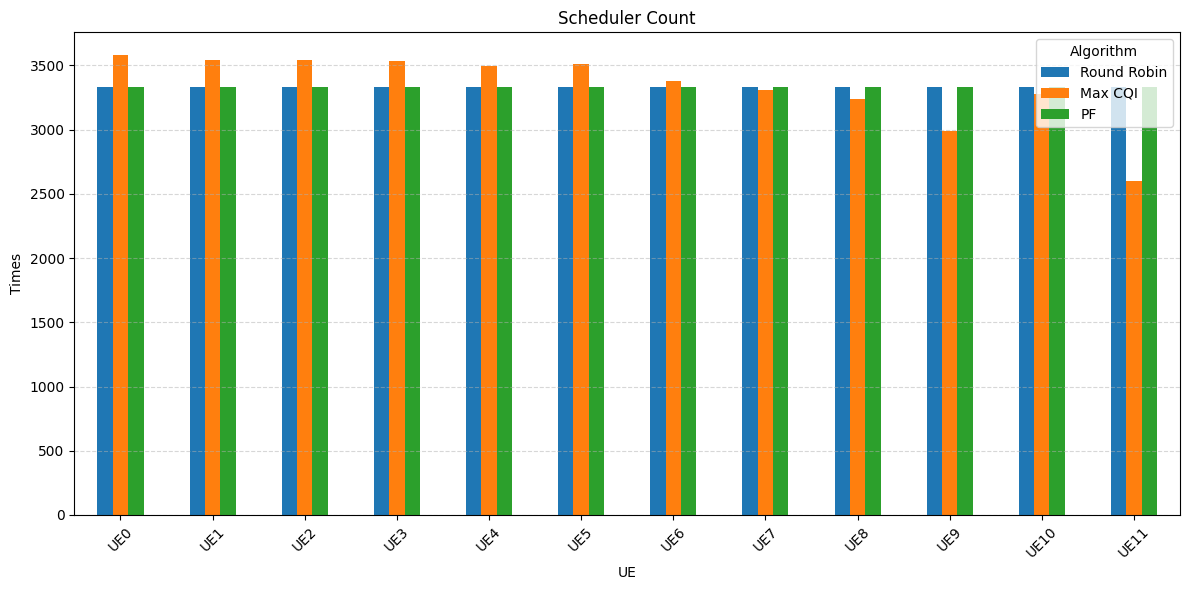

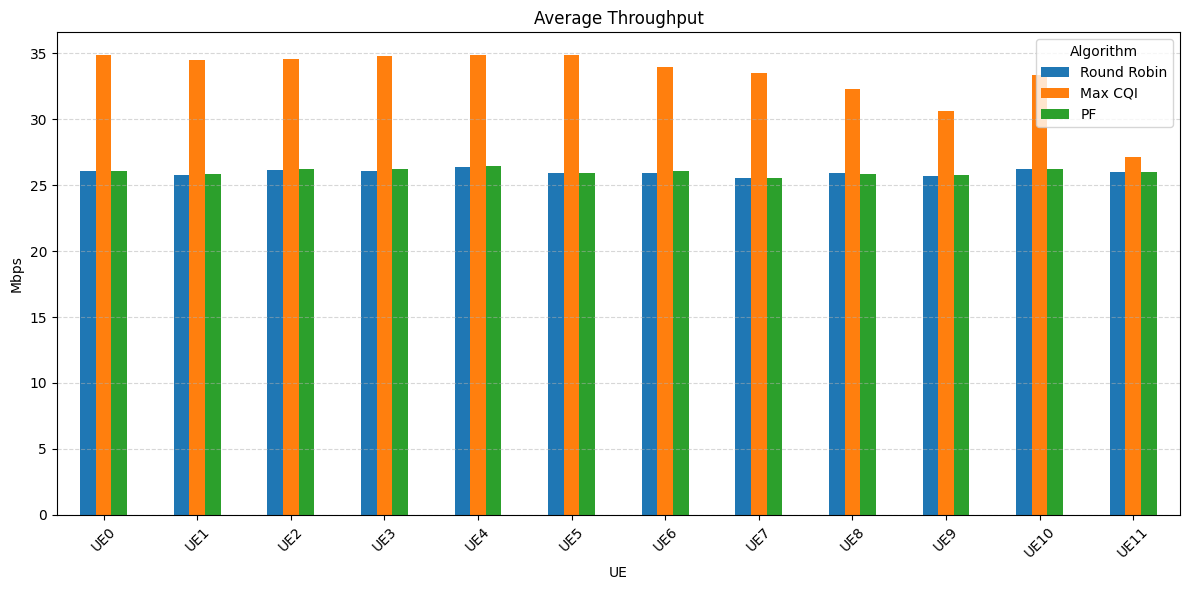

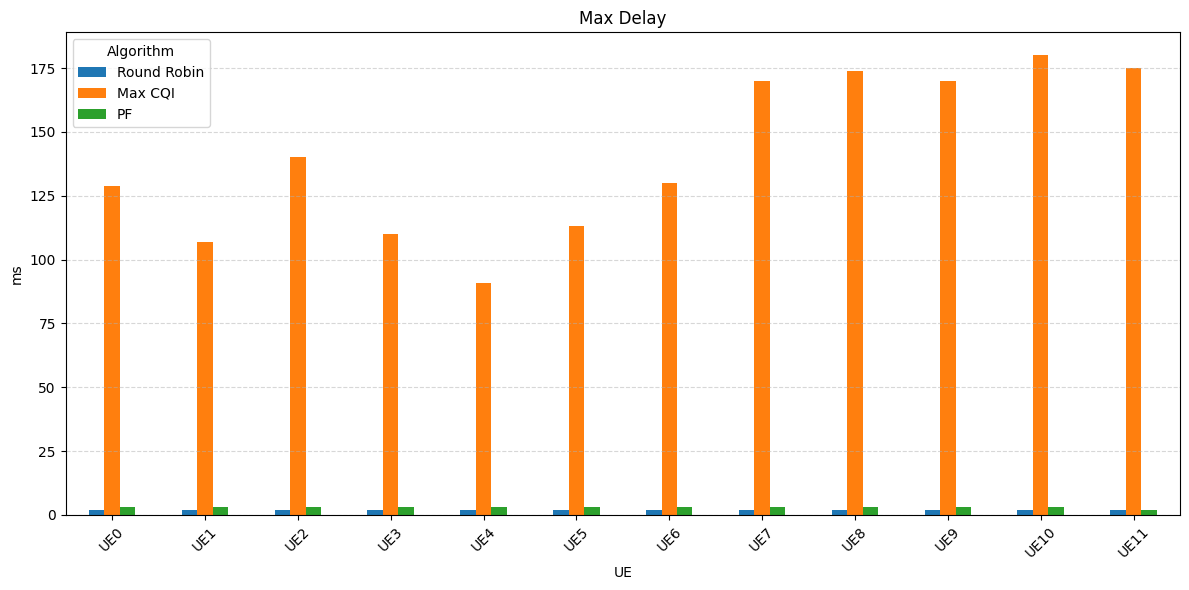

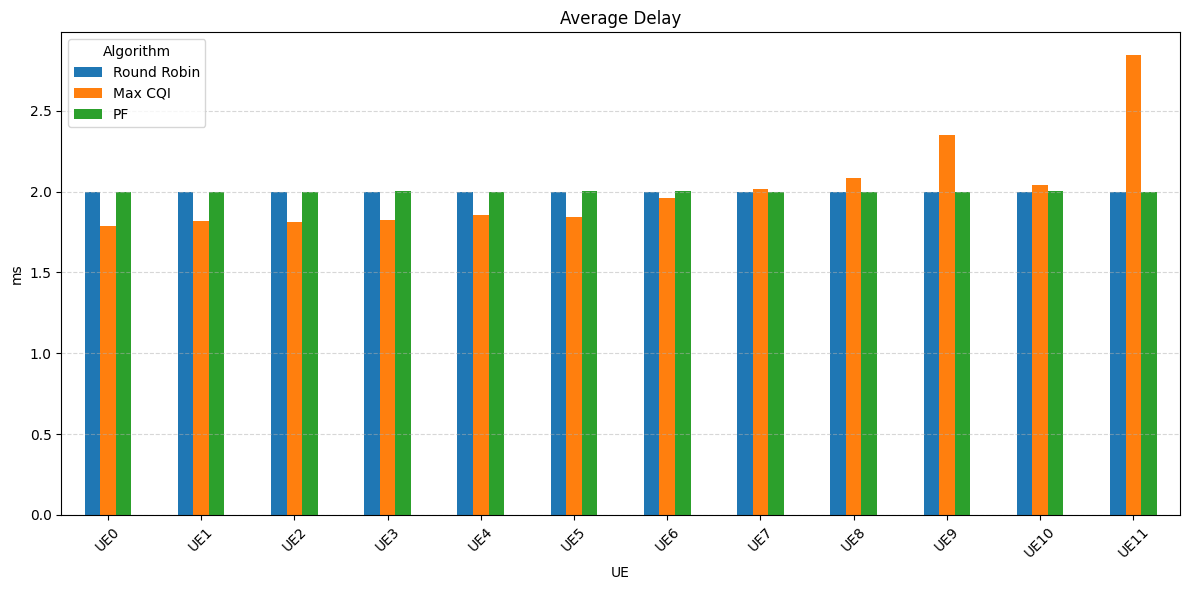

In [7]:
# Vẽ biểu đồ cột nhóm
scheduler_count_DF1.plot(kind='bar', figsize=(12, 6))

plt.title("Scheduler Count")
plt.ylabel("Times")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()

avg_throughput_DF1.plot(kind='bar', figsize=(12, 6))
plt.title("Average Throughput")
plt.ylabel("Mbps")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()  

max_delay_DF1.plot(kind='bar', figsize=(12, 6))
plt.title("Max Delay")
plt.ylabel("ms")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()

avg_delay_DF1.plot(kind='bar', figsize=(12, 6))
plt.title("Average Delay")
plt.ylabel("ms")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()


## High Traffic

### Round Robin

In [8]:
ue = [col for col in RoundRobin_HighTraffic.columns if col.startswith('UE')]
RoundRobin_HighTraffic_UE = RoundRobin_HighTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (RoundRobin_HighTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = RoundRobin_HighTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = RoundRobin_HighTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

# save summary to CSV
summary.to_csv('./Simulation/result/high_traffic/rr_HighTraffic_summary.csv')

scheduler_count_DF2['Round Robin'] = summary['Scheduler Count']
avg_throughput_DF2['Round Robin'] = summary['Avg Throughput (Mbps)']
max_delay_DF2['Round Robin'] = summary['Max Delay']
avg_delay_DF2['Round Robin'] = summary['Avg Delay']

total_throughput_DF1.at['High Traffic', 'Round Robin'] = total_throughput_mbps


Avg Throughput for cell: 23.173051 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3334                25              23.594464        2.0   
UE1              3334                25              22.985000        2.0   
UE2              3334                25              23.166808        2.0   
UE3              3334                25              23.237240        2.0   
UE4              3333                25              23.097896        2.0   
UE5              3333                25              23.054848        2.0   
UE6              3333                25              23.231296        2.0   
UE7              3333                25              23.226968        2.0   
UE8              3333                25              23.181072        2.0   
UE9              3333                25              23.241912        2.0   
UE10             3333                25              22.998160        2.0  

### Max C/I

In [9]:
ue = [col for col in MaxCQI_HighTraffic.columns if col.startswith('UE')]
MaxCQI_HighTraffic_UE = MaxCQI_HighTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (MaxCQI_HighTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = MaxCQI_HighTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = MaxCQI_HighTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF2['Max CQI'] = summary['Scheduler Count']
avg_throughput_DF2['Max CQI'] = summary['Avg Throughput (Mbps)']
max_delay_DF2['Max CQI'] = summary['Max Delay']
avg_delay_DF2['Max CQI'] = summary['Avg Delay']

total_throughput_DF1.at['High Traffic', 'Max CQI'] = total_throughput_mbps


Avg Throughput for cell: 29.169827 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              4860                25               41.60240       90.0   
UE1              4070                25               34.72232       80.0   
UE2              4280                25               36.96224      100.0   
UE3              3850                25               33.40080      120.0   
UE4              3740                25               32.61272      150.0   
UE5              3440                25               30.14752      100.0   
UE6              3450                25               30.33512      110.0   
UE7              2920                25               26.00992      280.0   
UE8              2720                25               24.21136      170.0   
UE9              2570                25               23.11096      200.0   
UE10             2090                25               18.77880      250.0  

### Proportional Fair

In [10]:
ue = [col for col in PF_HighTraffic.columns if col.startswith('UE')]
PF_HighTraffic_UE = PF_HighTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (PF_HighTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = PF_HighTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = PF_HighTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF2['PF'] = summary['Scheduler Count']
avg_throughput_DF2['PF'] = summary['Avg Throughput (Mbps)']
max_delay_DF2['PF'] = summary['Max Delay']
avg_delay_DF2['PF'] = summary['Avg Delay']

total_throughput_DF1.at['High Traffic', 'PF'] = total_throughput_mbps

Avg Throughput for cell: 23.184053 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3333                25              23.543224        2.0   
UE1              3333                25              23.006376        2.0   
UE2              3334                25              23.166808        2.0   
UE3              3334                25              23.237240        2.0   
UE4              3333                25              23.097896        2.0   
UE5              3333                25              23.170224        2.0   
UE6              3333                25              23.273096        2.0   
UE7              3333                25              23.246664        2.0   
UE8              3333                25              23.181072        2.0   
UE9              3334                25              23.180912        2.0   
UE10             3333                25              22.969520        2.0  

### Analysics

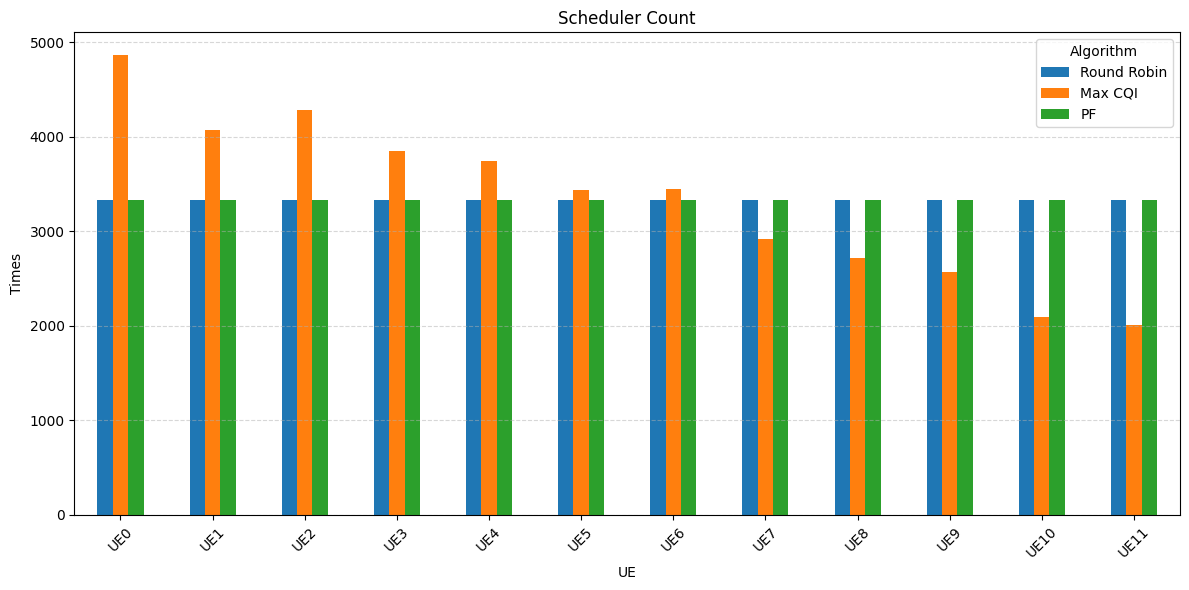

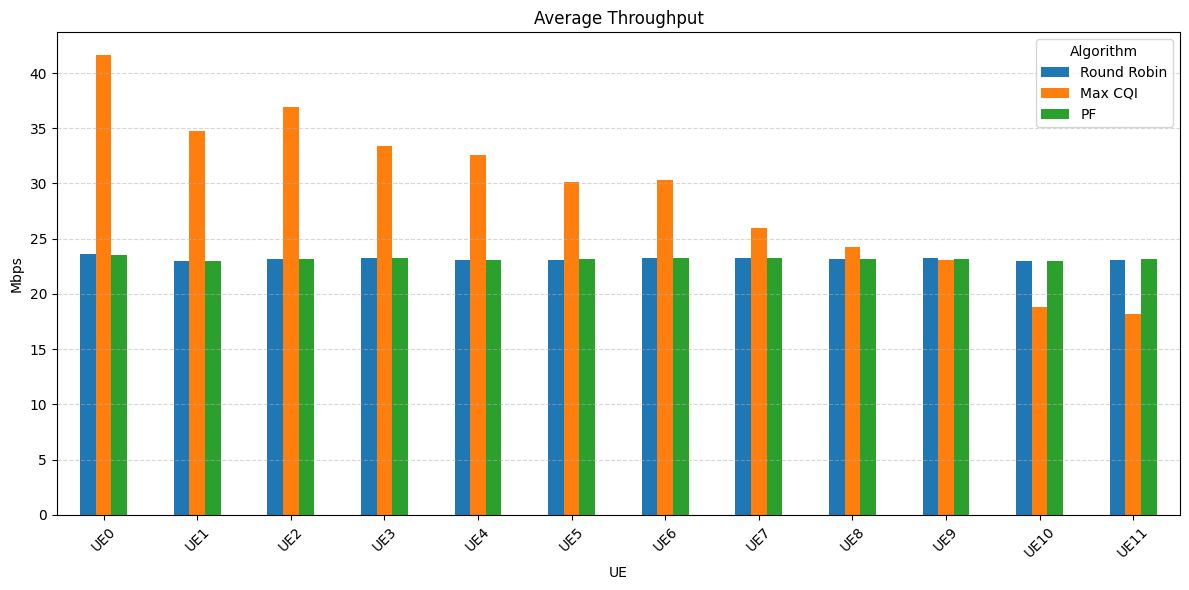

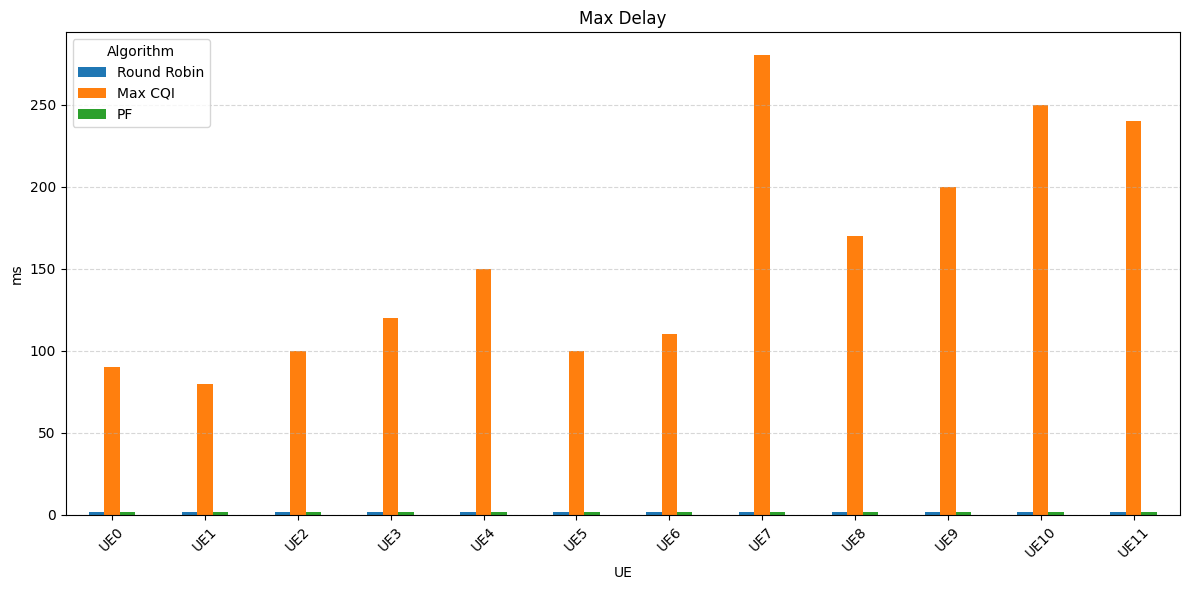

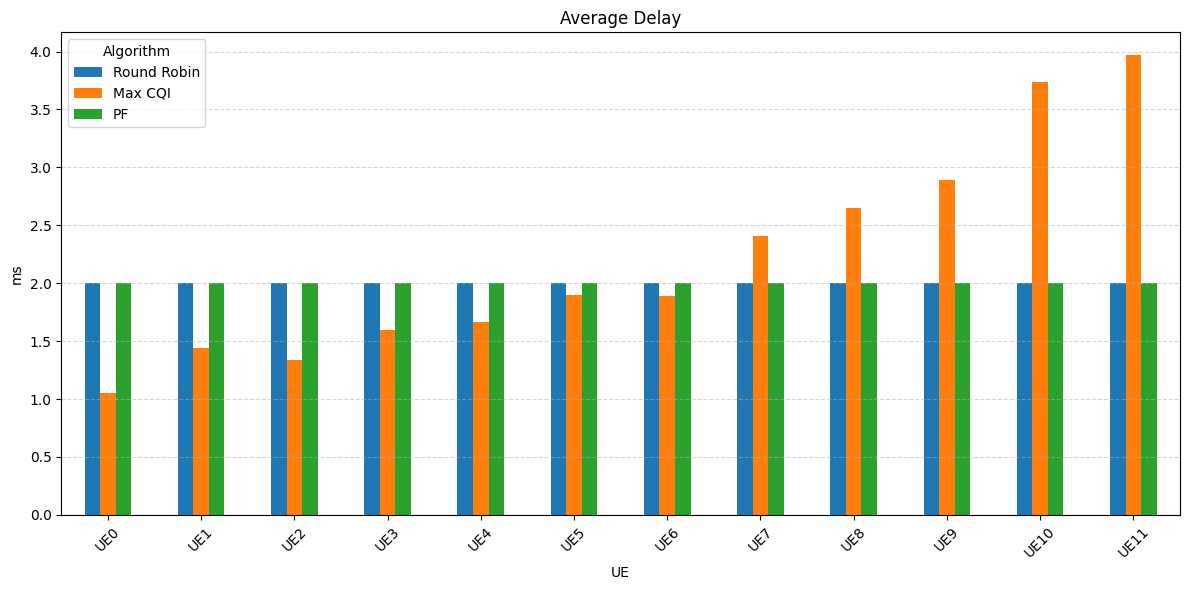

In [11]:
# Vẽ biểu đồ cột nhóm
scheduler_count_DF2.plot(kind='bar', figsize=(12, 6))

plt.title("Scheduler Count")
plt.ylabel("Times")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()

avg_throughput_DF2.plot(kind='bar', figsize=(12, 6))
plt.title("Average Throughput")
plt.ylabel("Mbps")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()  

max_delay_DF2.plot(kind='bar', figsize=(12, 6))
plt.title("Max Delay")
plt.ylabel("ms")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()

avg_delay_DF2.plot(kind='bar', figsize=(12, 6))
plt.title("Average Delay")
plt.ylabel("ms")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()


## Ideal 100000bit

### Round Robin

In [12]:
ue = [col for col in RoundRobin_IdealTraffic.columns if col.startswith('UE')]
RoundRobin_IdealTraffic_UE = RoundRobin_IdealTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (RoundRobin_IdealTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = RoundRobin_IdealTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = RoundRobin_IdealTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF3['Round Robin'] = summary['Scheduler Count']
avg_throughput_DF3['Round Robin'] = summary['Avg Throughput (Mbps)']
max_delay_DF3['Round Robin'] = summary['Max Delay']
avg_delay_DF3['Round Robin'] = summary['Avg Delay']


total_throughput_DF1.at['Ideal Traffic', 'Round Robin'] = total_throughput_mbps

Avg Throughput for cell: 31.245323 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              5275                25              85.490112        3.0   
UE1              3960                25              64.396472        2.0   
UE2              3414                25              55.545792        2.0   
UE3              3334                25              54.003808        2.0   
UE4              3334                25              24.046160        2.0   
UE5              3333                25              23.352664        2.0   
UE6              3333                25              23.684432        2.0   
UE7              3333                25              23.942952        2.0   
UE8              2747                25               5.148448       41.0   
UE9              2621                25               5.071600       41.0   
UE10             2619                25               5.090328       44.0  

### Max CQI

In [13]:
ue = [col for col in MaxCQI_IdealTraffic.columns if col.startswith('UE')]
MaxCQI_IdealTraffic_UE = MaxCQI_IdealTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (MaxCQI_IdealTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = MaxCQI_IdealTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = MaxCQI_IdealTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF3['Max CQI'] = summary['Scheduler Count']
avg_throughput_DF3['Max CQI'] = summary['Avg Throughput (Mbps)']
max_delay_DF3['Max CQI'] = summary['Max Delay']
avg_delay_DF3['Max CQI'] = summary['Avg Delay']


total_throughput_DF1.at['Ideal Traffic', 'Max CQI'] = total_throughput_mbps

Avg Throughput for cell: 43.219777 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              6500                25             103.676128        5.0   
UE1              6436                25             103.163880        5.0   
UE2              6478                25             103.696432        5.0   
UE3              6470                25             103.095424        5.0   
UE4              3701                25              27.666320        8.0   
UE5              3532                25              25.826496        8.0   
UE6              3508                25              26.089360        8.0   
UE7              3375                25              25.423280        8.0   
UE8                 0                 0               0.000000        0.0   
UE9                 0                 0               0.000000        0.0   
UE10                0                 0               0.000000        0.0  

### Proportional Fair

In [14]:
ue = [col for col in PF_IdealTraffic.columns if col.startswith('UE')]
PF_IdealTraffic_UE = PF_IdealTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (PF_IdealTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = PF_IdealTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = PF_IdealTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF3['PF'] = summary['Scheduler Count']
avg_throughput_DF3['PF'] = summary['Avg Throughput (Mbps)']
max_delay_DF3['PF'] = summary['Max Delay']
avg_delay_DF3['PF'] = summary['Avg Delay']

total_throughput_DF1.at['Ideal Traffic', 'PF'] = total_throughput_mbps

Avg Throughput for cell: 29.648240 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3574                25              57.935992        2.0   
UE1              3572                25              58.071056        3.0   
UE2              3575                25              58.143680        2.0   
UE3              3574                25              57.874336        3.0   
UE4              3558                25              25.701312        3.0   
UE5              3556                25              24.919224        3.0   
UE6              3562                25              25.435960        3.0   
UE7              3559                25              25.591344        3.0   
UE8              2947                25               5.546392       42.0   
UE9              2826                25               5.487200       41.0   
UE10             2802                25               5.477896       42.0  

### Analysics

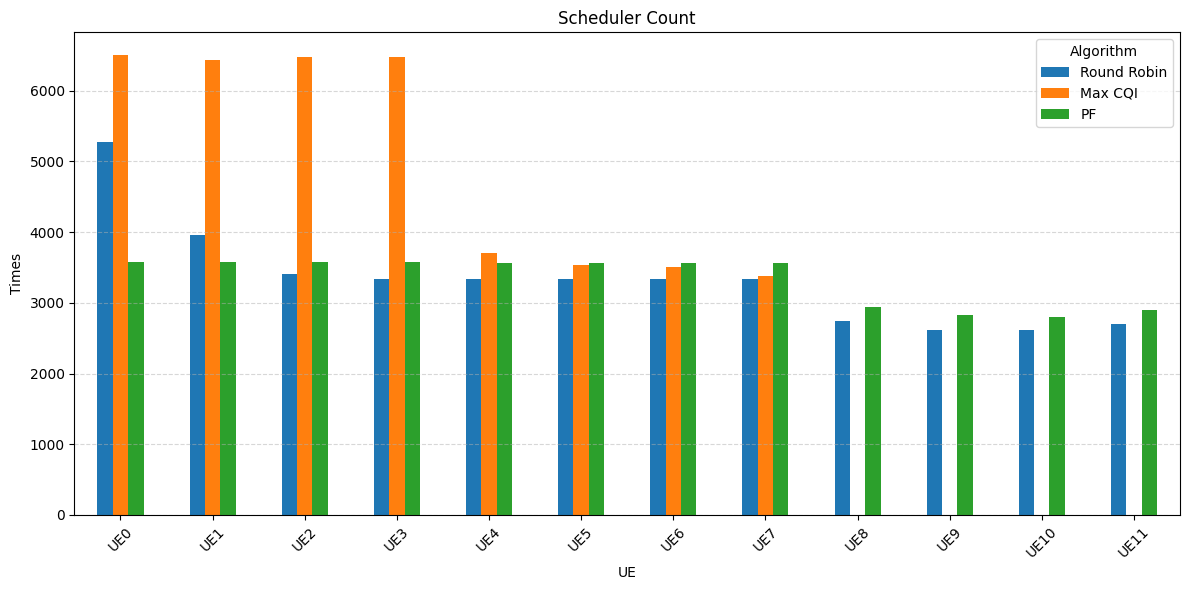

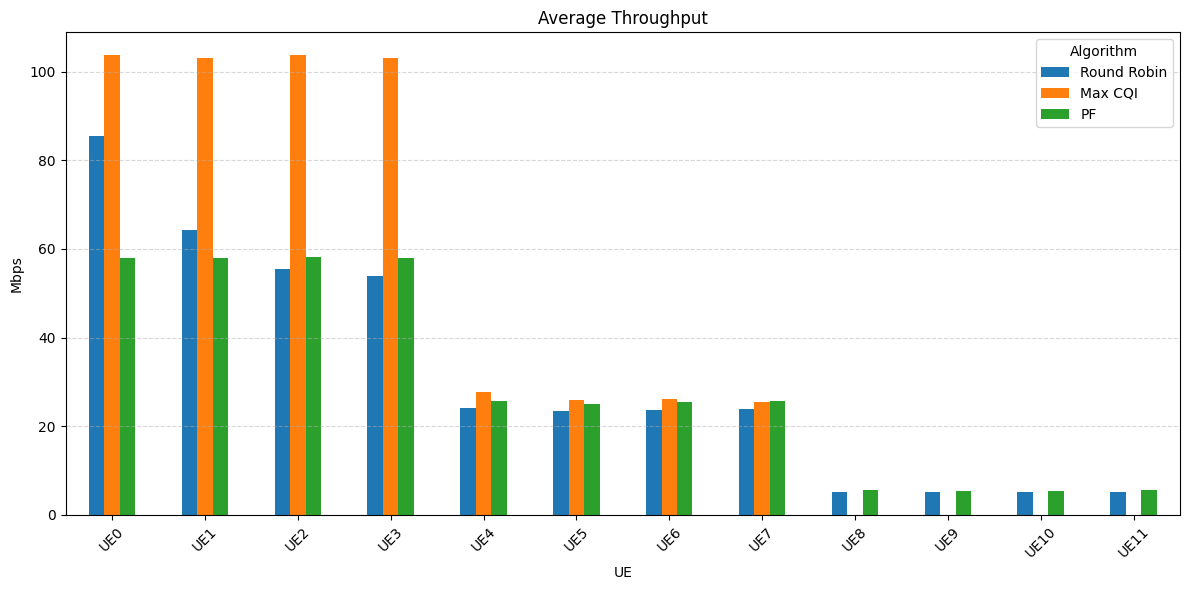

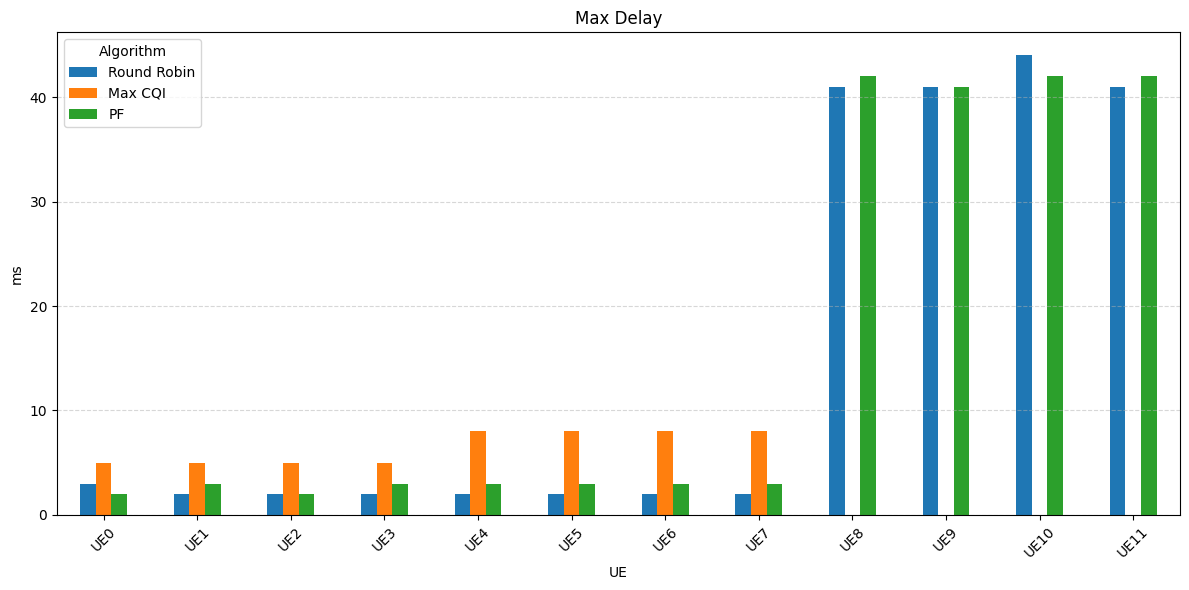

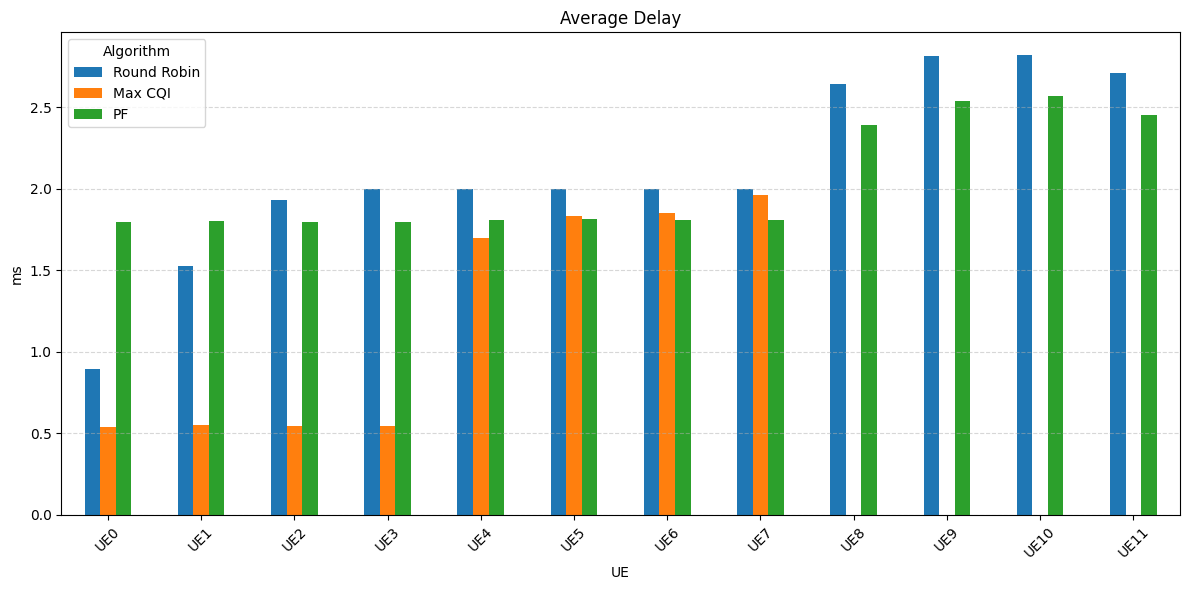

In [15]:
# Vẽ biểu đồ cột nhóm
scheduler_count_DF3.plot(kind='bar', figsize=(12, 6))

plt.title("Scheduler Count")
plt.ylabel("Times")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()

avg_throughput_DF3.plot(kind='bar', figsize=(12, 6))
plt.title("Average Throughput")
plt.ylabel("Mbps")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()  

max_delay_DF3.plot(kind='bar', figsize=(12, 6))
plt.title("Max Delay")
plt.ylabel("ms")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()

avg_delay_DF3.plot(kind='bar', figsize=(12, 6))
plt.title("Average Delay")
plt.ylabel("ms")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()


## Mobility Partern

### Round Robin

In [16]:
ue = [col for col in RoundRobin_MobilityPattern.columns if col.startswith('UE')]
RoundRobin_MobilityPattern_UE = RoundRobin_MobilityPattern[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (RoundRobin_MobilityPattern_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = RoundRobin_MobilityPattern_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = RoundRobin_MobilityPattern_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF4['Round Robin'] = summary['Scheduler Count']
avg_throughput_DF4['Round Robin'] = summary['Avg Throughput (Mbps)']
max_delay_DF4['Round Robin'] = summary['Max Delay']
avg_delay_DF4['Round Robin'] = summary['Avg Delay']

total_throughput_DF1.at['Mobility Pattern', 'Round Robin'] = total_throughput_mbps


Avg Throughput for cell: 27.253228 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3336                25              27.307160        2.0   
UE1              3334                25              27.245936        2.0   
UE2              3334                25              27.257640        2.0   
UE3              3334                25              27.232136        2.0   
UE4              3333                25              27.290056        2.0   
UE5              3333                25              27.254320        2.0   
UE6              3333                25              27.246752        2.0   
UE7              3333                25              27.249128        2.0   
UE8              3333                25              27.252024        2.0   
UE9              3333                25              27.244736        2.0   
UE10             3331                25              27.233104        5.0  

### Max CQI

In [17]:
ue = [col for col in MaxCQI_MobilityPattern.columns if col.startswith('UE')]
MaxCQI_MobilityPattern_UE = MaxCQI_MobilityPattern[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (MaxCQI_MobilityPattern_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = MaxCQI_MobilityPattern_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = MaxCQI_MobilityPattern_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF4['Max CQI'] = summary['Scheduler Count']
avg_throughput_DF4['Max CQI'] = summary['Avg Throughput (Mbps)']
max_delay_DF4['Max CQI'] = summary['Max Delay']
avg_delay_DF4['Max CQI'] = summary['Avg Delay']


total_throughput_DF1.at['Mobility Pattern', 'Max CQI'] = total_throughput_mbps


Avg Throughput for cell: 47.439601 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3313                25              45.690496     1263.0   
UE1              3382                25              46.778224     1004.0   
UE2              3391                25              47.356424      890.0   
UE3              3431                25              47.277344      846.0   
UE4              3257                25              46.912992      738.0   
UE5              3269                25              47.280104      684.0   
UE6              3291                25              47.960872      616.0   
UE7              3325                25              48.106960      615.0   
UE8              3339                25              48.237328      557.0   
UE9              3421                25              48.868608      535.0   
UE10             3293                25              47.496272      505.0  

### Proportional Fair

In [18]:
ue = [col for col in PF_MobilityPattern.columns if col.startswith('UE')]
PF_MobilityPattern_UE = PF_MobilityPattern[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (PF_MobilityPattern_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = PF_MobilityPattern_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = PF_MobilityPattern_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF4['PF'] = summary['Scheduler Count']
avg_throughput_DF4['PF'] = summary['Avg Throughput (Mbps)']
max_delay_DF4['PF'] = summary['Max Delay']
avg_delay_DF4['PF'] = summary['Avg Delay']


total_throughput_DF1.at['Mobility Pattern', 'PF'] = total_throughput_mbps

Avg Throughput for cell: 27.248437 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3334                25              27.281552        2.0   
UE1              3334                25              27.254272        2.0   
UE2              3334                25              27.257640        2.0   
UE3              3334                25              27.232136        2.0   
UE4              3334                25              27.228312        2.0   
UE5              3333                25              27.254320        2.0   
UE6              3333                25              27.246752        2.0   
UE7              3333                25              27.249128        2.0   
UE8              3333                25              27.257920        2.0   
UE9              3333                25              27.244736        2.0   
UE10             3332                25              27.248736        5.0  

### Analysics

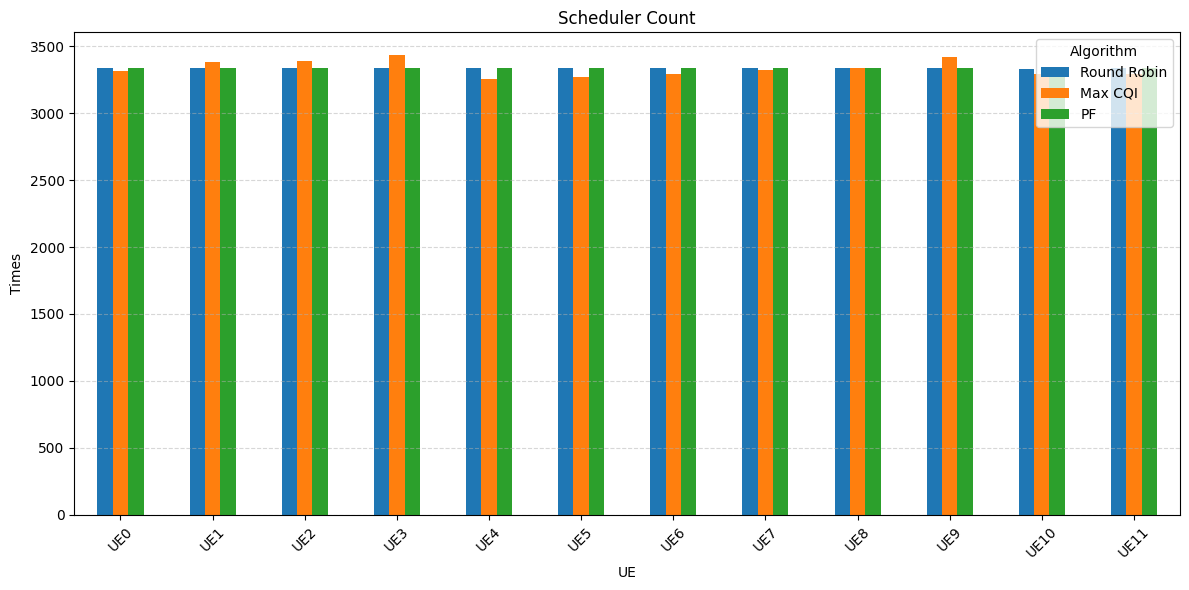

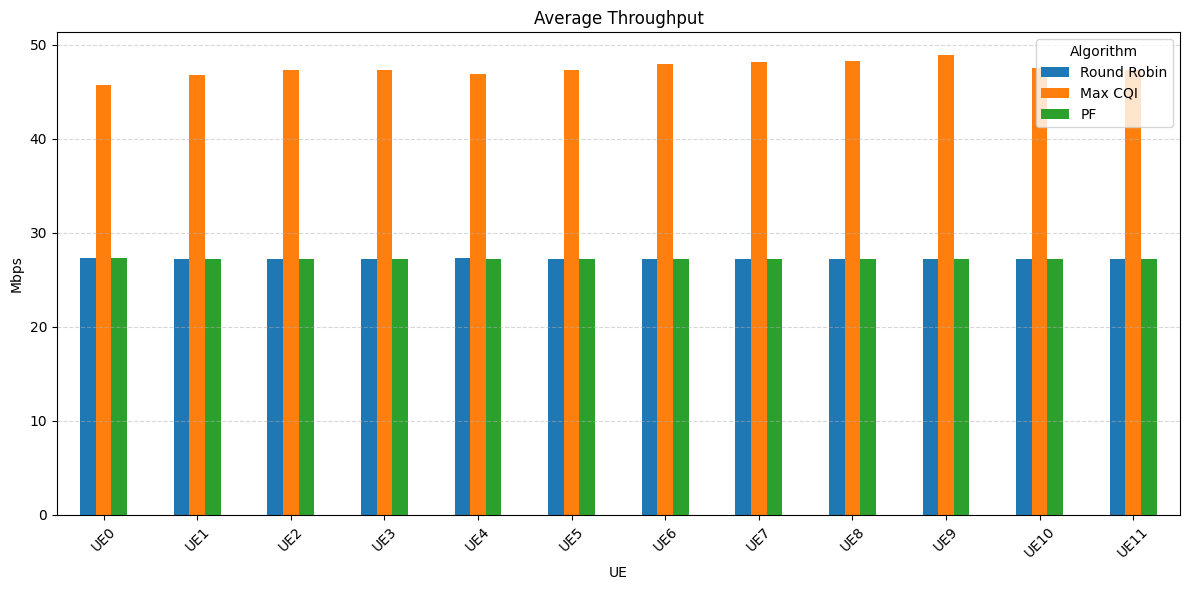

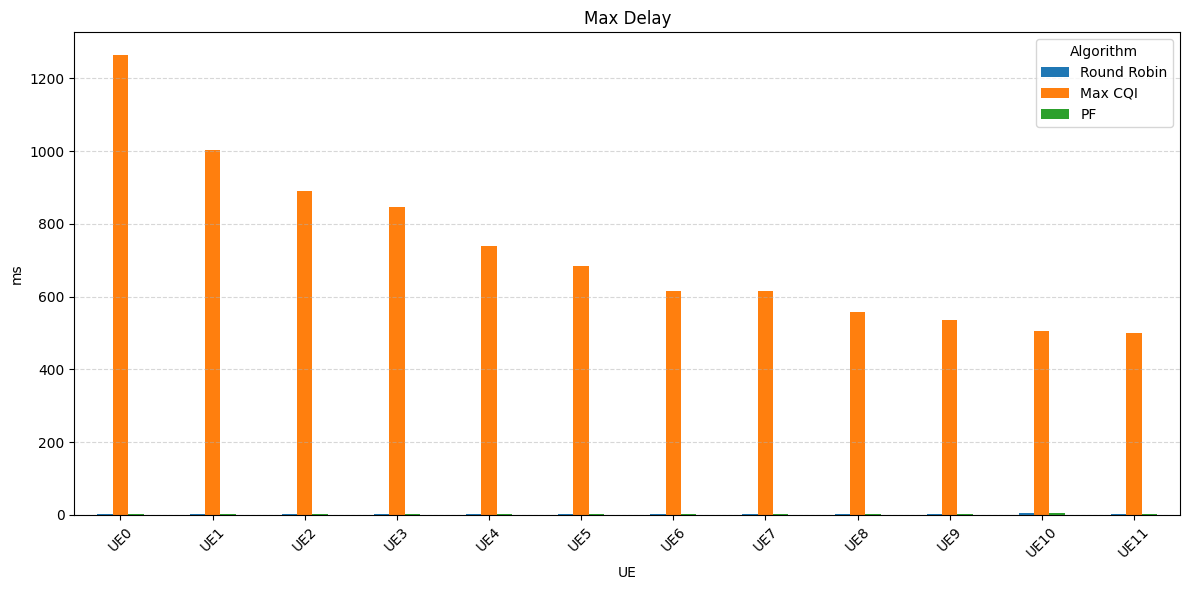

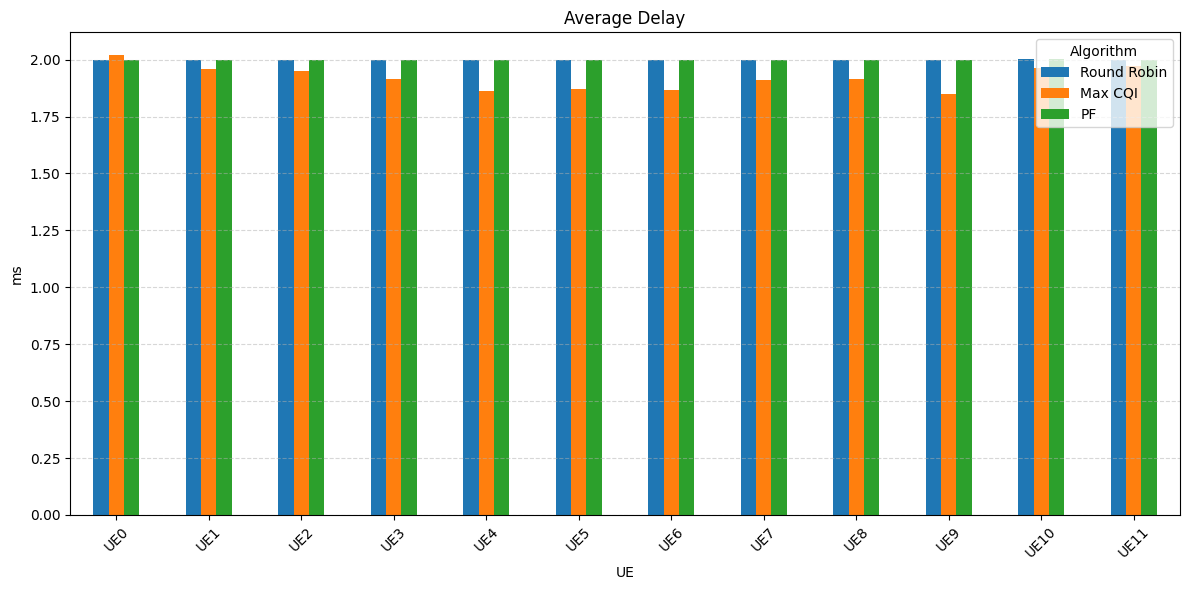

In [19]:
# Vẽ biểu đồ cột nhóm
scheduler_count_DF4.plot(kind='bar', figsize=(12, 6))

plt.title("Scheduler Count")
plt.ylabel("Times")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()

avg_throughput_DF4.plot(kind='bar', figsize=(12, 6))
plt.title("Average Throughput")
plt.ylabel("Mbps")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()  

max_delay_DF4.plot(kind='bar', figsize=(12, 6))
plt.title("Max Delay")
plt.ylabel("ms")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()

avg_delay_DF4.plot(kind='bar', figsize=(12, 6))
plt.title("Average Delay")
plt.ylabel("ms")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()


## Low traffic

### Round Robin

In [20]:
ue = [col for col in RoundRobin_LowTraffic.columns if col.startswith('UE')]
RoundRobin_LowTraffic_UE = RoundRobin_LowTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (RoundRobin_LowTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = RoundRobin_LowTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = RoundRobin_LowTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF5['Round Robin'] = summary['Scheduler Count']
avg_throughput_DF5['Round Robin'] = summary['Avg Throughput (Mbps)']
max_delay_DF5['Round Robin'] = summary['Max Delay']
avg_delay_DF5['Round Robin'] = summary['Avg Delay']


total_throughput_DF1.at['Low Traffic', 'Round Robin'] = total_throughput_mbps

Avg Throughput for cell: 21.851933 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              1474                25              21.919832       11.0   
UE1              1473                25              21.653496       11.0   
UE2              1468                25              21.701872       11.0   
UE3              1445                25              21.715520       11.0   
UE4              1500                25              22.206592       11.0   
UE5              1479                25              21.929856       11.0   
UE6              1438                25              21.582000       11.0   
UE7              1482                25              21.992616       11.0   
UE8              1481                25              22.041976       11.0   
UE9              1470                25              21.763048       11.0   
UE10             1492                25              22.021720       11.0  

### Max CQI

In [21]:
ue = [col for col in MaxCQI_LowTraffic.columns if col.startswith('UE')]
MaxCQI_LowTraffic_UE = MaxCQI_LowTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (MaxCQI_LowTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = MaxCQI_LowTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = MaxCQI_LowTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF5['Max CQI'] = summary['Scheduler Count']
avg_throughput_DF5['Max CQI'] = summary['Avg Throughput (Mbps)']
max_delay_DF5['Max CQI'] = summary['Max Delay']
avg_delay_DF5['Max CQI'] = summary['Avg Delay']


total_throughput_DF1.at['Low Traffic', 'Max CQI'] = total_throughput_mbps

Avg Throughput for cell: 21.851933 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              1474                25              21.919832       13.0   
UE1              1473                25              21.653496       13.0   
UE2              1468                25              21.701872       13.0   
UE3              1445                25              21.715520       13.0   
UE4              1500                25              22.206592       13.0   
UE5              1479                25              21.929856       13.0   
UE6              1438                25              21.582000       13.0   
UE7              1482                25              21.992616       13.0   
UE8              1481                25              22.041976       13.0   
UE9              1470                25              21.763048       13.0   
UE10             1492                25              22.021720       13.0  

### Proportional Fair

In [22]:
ue = [col for col in PF_LowTraffic.columns if col.startswith('UE')]
PF_LowTraffic_UE = PF_LowTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (PF_LowTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = PF_LowTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = PF_LowTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF5['PF'] = summary['Scheduler Count']
avg_throughput_DF5['PF'] = summary['Avg Throughput (Mbps)']
max_delay_DF5['PF'] = summary['Max Delay']
avg_delay_DF5['PF'] = summary['Avg Delay']


total_throughput_DF1.at['Low Traffic', 'PF'] = total_throughput_mbps

Avg Throughput for cell: 21.851933 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              1474                25              21.919832        9.0   
UE1              1473                25              21.653496        9.0   
UE2              1468                25              21.701872        9.0   
UE3              1445                25              21.715520        9.0   
UE4              1500                25              22.206592        9.0   
UE5              1479                25              21.929856        9.0   
UE6              1438                25              21.582000        9.0   
UE7              1482                25              21.992616        9.0   
UE8              1481                25              22.041976        9.0   
UE9              1470                25              21.763048        9.0   
UE10             1492                25              22.021720        9.0  

### Analysics

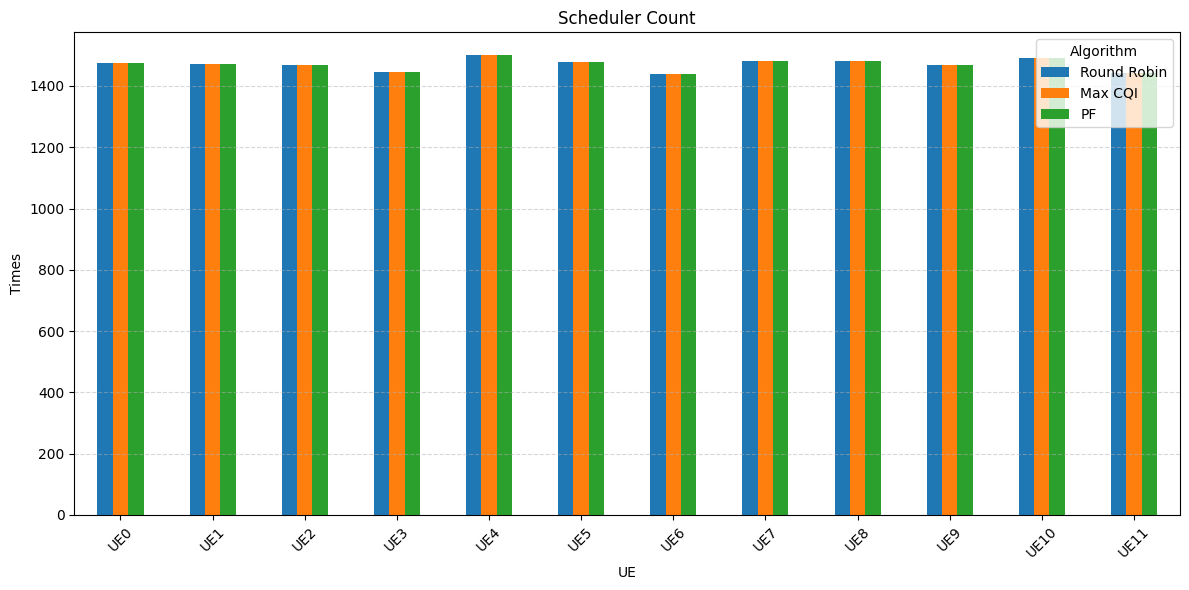

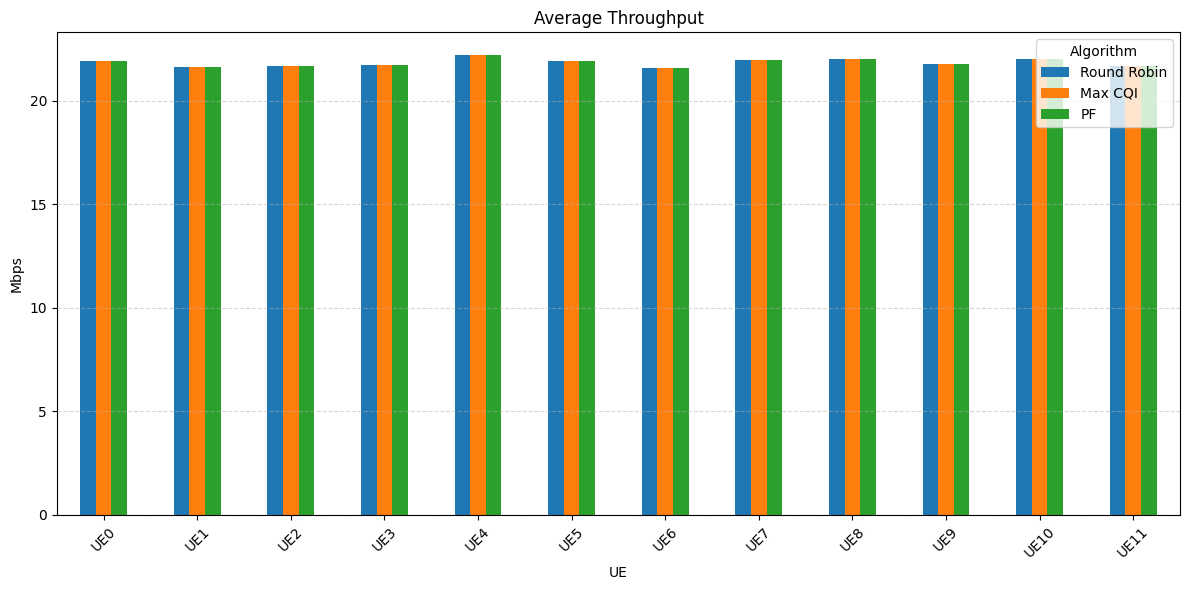

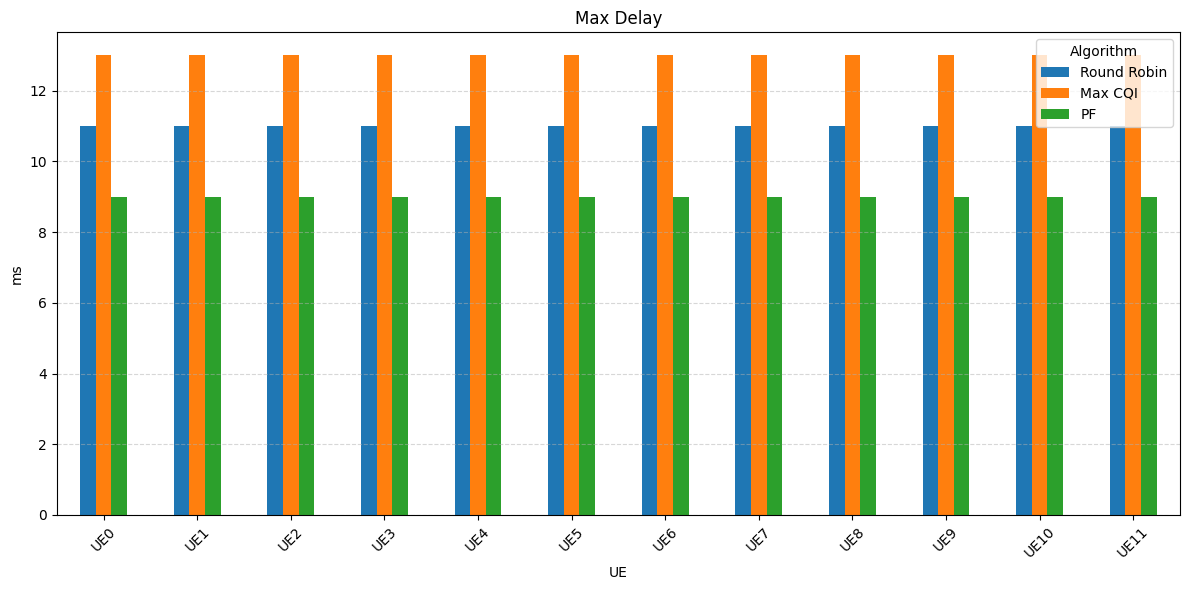

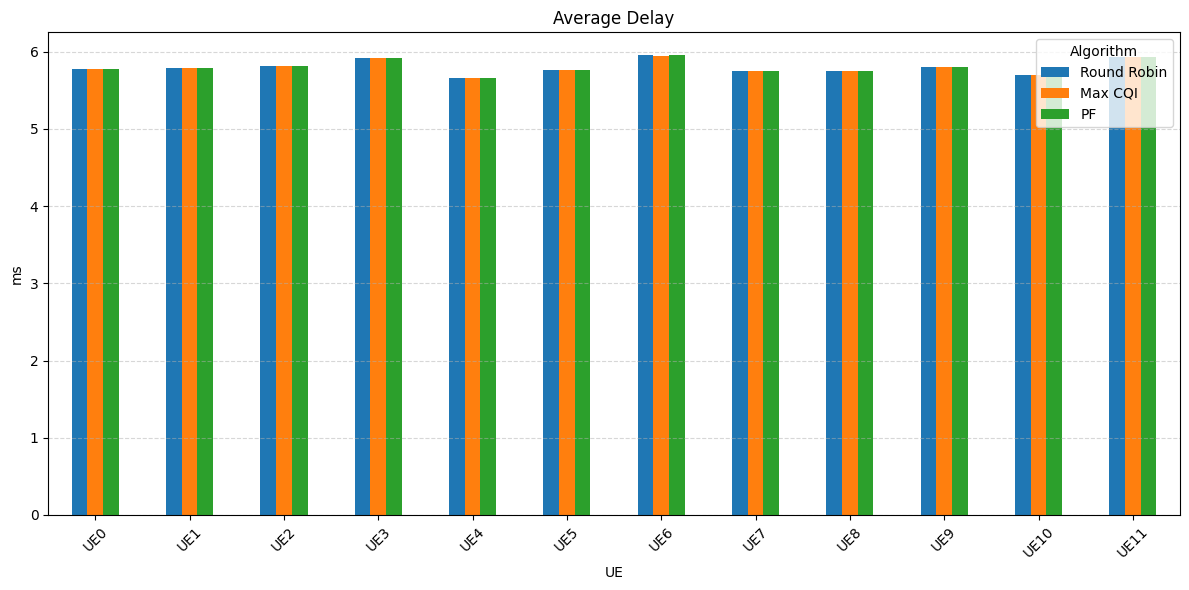

In [23]:
# Vẽ biểu đồ cột nhóm
scheduler_count_DF5.plot(kind='bar', figsize=(12, 6))

plt.title("Scheduler Count")
plt.ylabel("Times")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()

avg_throughput_DF5.plot(kind='bar', figsize=(12, 6))
plt.title("Average Throughput")
plt.ylabel("Mbps")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()  

max_delay_DF5.plot(kind='bar', figsize=(12, 6))
plt.title("Max Delay")
plt.ylabel("ms")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()

avg_delay_DF5.plot(kind='bar', figsize=(12, 6))
plt.title("Average Delay")
plt.ylabel("ms")
plt.xlabel("UE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()


## Total Throughput

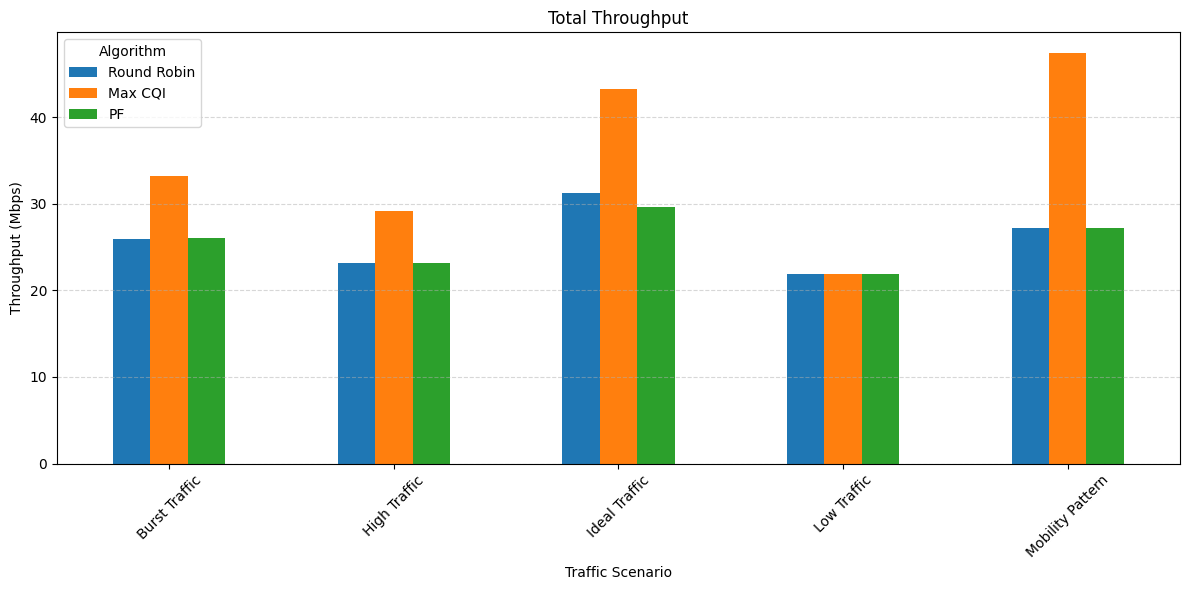

In [24]:

total_throughput_DF1.plot(kind='bar', figsize=(12, 6))

plt.title("Total Throughput")
plt.ylabel("Throughput (Mbps)")
plt.xlabel("Traffic Scenario")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Algorithm")
plt.show()